<h1>Credit Card Fraud Detection</h1>


It is significant for the credit card companies to prevent customers being charged for items they did not purchase.

In [38]:
#importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score, f1_score

In [39]:
#Load the csv file
data=pd.read_csv("creditcard.csv")

In [40]:
#overview of the dataset
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#descriptive statistics summary of the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<h3>Exploratory data analysis on the dataset</h3>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
#Check for any null values
data.isnull().values.any()

False

In [7]:
#describing "Amount" column
data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [8]:
#overall statistics of genuine and fraud transacations
genuine_trans=len(data[data.Class==0])
fraud_trans=len(data[data.Class==1])
fraud_percent=(fraud_trans/(genuine_trans+fraud_trans))*100

print("Number of Genuine Transactions:",genuine_trans)
print("Numeer of Fraud Transactions:",fraud_trans)
print("Percentage of Fraud transactions: {:4f}".format(fraud_percent))

Number of Genuine Transactions: 284315
Numeer of Fraud Transactions: 492
Percentage of Fraud transactions: 0.172749


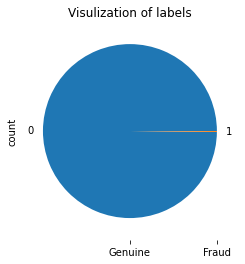

In [9]:
#Visulize the Labels column in our dataset

labels=["Genuine","Fraud"]
count_class=data.value_counts(data['Class'],sort=True)
count_class.plot(kind="pie")
plt.title("Visulization of labels")
plt.ylabel("count")
plt.xticks(range(2),labels)
plt.show()

In [10]:
#data scaling
scaler=StandardScaler()
data["NormalizedAmount"]=scaler.fit_transform(data["Amount"].values.reshape(-1,1))
data.drop(["Amount","Time"],inplace=True,axis=1)

Y=data["Class"]
X=data.drop(["Class"],axis=1)

In [11]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [12]:
#split the data
(train_X,test_X,train_Y,test_Y)=train_test_split(X,Y,test_size=0.3,random_state=42)
print("Shape of train_X:",train_X.shape)
print("Shape of test_X:",test_X.shape)

Shape of train_X: (199364, 29)
Shape of test_X: (85443, 29)


We will train the datasets with different models and observe which alogorithm works better.
We will be applying Random Forests and Decision Trees alogorithm and compare.

In [13]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)

predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

In [14]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)

predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

In [15]:
print("Decision Tree score: ",decision_tree_score)
print("Random Forest score: ",random_forest_score)

Decision Tree score:  99.91924440855307
Random Forest score:  99.96137776061234


In [34]:
# thisfunction is directly taken from the scikit-learn website to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [35]:
#Confusion matrix for decision tree
confusion_matrix_dt=confusion_matrix(test_Y,predictions_dt.round())
print("Confusion Matrix-Decision Tree")
print(confusion_matrix_dt)

Confusion Matrix-Decision Tree
[[85268    39]
 [   30   106]]


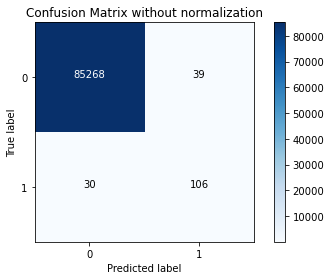

In [36]:
plot_confusion_matrix(confusion_matrix_dt,classes=[0,1],title="Confusion Matrix")

In [19]:
#Confusion matrix for decision tree
confusion_matrix_rf=confusion_matrix(test_Y,predictions_rf.round())
print("Confusion Matrix-Random Forests")
print(confusion_matrix_rf)

Confusion Matrix-Random Forests
[[85301     6]
 [   27   109]]


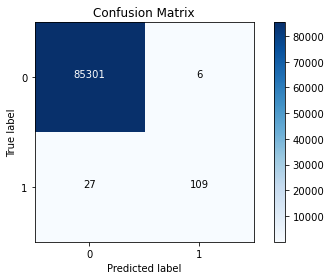

In [37]:
plot_confusion_matrix(confusion_matrix_rf,classes=[0,1],title="Confusion Matrix")

In [21]:
#function to print the necessary metrics
def metrics(actuals,predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals,predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals,predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals,predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals,predictions)))

In [22]:
#Metrics of decision Tree
print("Evaluation of Decision Tree Model")
metrics(test_Y,predictions_dt.round())

Evaluation of Decision Tree Model
Accuracy: 0.99919
Precision: 0.73103
Recall: 0.77941
F1-score: 0.75445


In [23]:
#Metrics of random forest
print("Evaluation of Random Forests Model")
metrics(test_Y,predictions_rf.round())

Evaluation of Random Forests Model
Accuracy: 0.99961
Precision: 0.94783
Recall: 0.80147
F1-score: 0.86853


Comparing the metrics helps us to conclude that random forest model works better than decision tree model.

References
[1]-Dataset, Available:Online
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
[2]-Confusion matrix,Available:Online
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html